# Recap
- class
    - 상속
    
- decorator
    - classmethod
    - staticmethod

- functional programming
    - iterator
    - generator


# 파이썬을 이용한 기본적인 input, output
- open기본 내장함수를 이용
    - open
        ```
        open(file_name, mode)
        ```
    - 읽기
        ```
        open(file_name, 'r') # r대신 rb도 씀
        ```
    - 쓰기
        ```
        open(file_name, 'w') # w대신 wb도 씀
        ```
- with문을 이용

In [1]:
f = open('my_text.txt','w')

f.write('hello this is the first line')
f.close()

In [2]:
r = open('my_text.txt', 'r')
r.readline()

'hello this is the first line'

In [3]:
with open('my_new_text.txt','w') as f:
    f.write('''
    여기서 이렇게 글을 쓰고 하면 \n
    글이 적히고 with 문이 끝나면 \n
    바로 파일이 닫힌다.
    ''')

In [4]:
with open('my_new_text.txt', 'r') as f:
    # lines = f.readlines()
    lines = f.read()
    print(lines)


    여기서 이렇게 글을 쓰고 하면 

    글이 적히고 with 문이 끝나면 

    바로 파일이 닫힌다.
    


In [5]:
# 매직매서드를 이용한 파일 생성

%%writefile my_text.txt

"""
hello, this is the first line.
And this is the next line
"""

UsageError: Line magic function `%%writefile` not found.


# Data Analytics Beginning
- 기본적인 라이브러리
    - numpy : 행렬을 다루는 라이브러리 -> 여기서는 다루진 않겠음
        - 선형대수적 연산을 할 수 있음
        - 많은 계산량이 필요할 때 종종 쓰이는 라이브러리. (C와 연동되어 있다)
    - pandas : 데이터를 다루는 라이브러리
        - csv, excel, xml등의 형식들을 다룰 수 있음
    - matplotlib : 데이터를 그림 그리는데 사용하는 라이브러리

- 공부방법
    - documentation을 읽는다.
    - 알고 싶은 것들을 구글링한다.
    

In [14]:
import numpy as np

In [15]:
myarray = np.array([[1,2,3],
         [4,5,6],
         [7,8,9]])

In [16]:
myarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# Pandas
- Series : pandas에서 배열 클래스. 동일한 데이터 타입의 값을 가진다.
- DataFrame : 여러개의 Series를 모아놓은 데이터프레임

## Series

In [1]:
import pandas as pd

In [32]:
series = pd.Series(np.random.randint(10,size=5))
series

0    3
1    2
2    9
3    7
4    3
dtype: int64

In [35]:
# index 설정

data = pd.Series(np.random.randint(10, size=5),
                index=list("ABCDE"))
# data.index
data.values

array([5, 1, 4, 9, 6])

In [37]:
# 이렇게 인덱스를 부르면 해당하는 값도 반환한다.
data['C'] 

4

In [41]:
# 인덱싱

data[:2]
data[0::2]


A    5
C    4
E    6
dtype: int64

In [43]:
# 이렇게 Series를 선언해도 된다.

data2 = pd.Series({'D':3, 'E':5, 'F':7})
data2

D    3
E    5
F    7
dtype: int64

In [47]:
# 같은 인덱스에 해당하는 정보들끼리 서로 연산도 가능함

result = data + data2 
result

A     NaN
B     NaN
C     NaN
D    12.0
E    11.0
F     NaN
dtype: float64

In [51]:
# 마스킹
result[result.isnull()] = data
result

A     5.0
B     1.0
C     4.0
D    12.0
E    11.0
F     NaN
dtype: float64

In [55]:
result[result.isnull()] = data2
result

A     5.0
B     1.0
C     4.0
D    12.0
E    11.0
F     7.0
dtype: float64

## DataFrame
- Series를 여러개 모아놓은 케이스
- index뿐 아니라 컬럼명이 존재함
- DataFrame 생성방법 :
    - 딕셔너리 안에 리스트
    - 리스트 안에 딕셔너리 

딕셔너리 안에 리스트

In [109]:
df = pd.DataFrame(
    {
    "name":["tom","sally", 'yujin', 'carl'],
    "age" : [30, 31, 23, 40],
    "location" : ["Seoul", "Seoul", "Ilsan", "Newyork"],
    "e-mail" : ['tom@naver.com',None,None,None]
    }
)

df

,name,age,location,e-mail
0,tom,30,Seoul,tom@naver.com
1,sally,31,Seoul,None
2,yujin,23,Ilsan,None
3,carl,40,Newyork,None


리스트 안에 딕셔너리

In [57]:
pd.DataFrame(
    [
        {"name":"tom", "age":30, "location":"Seoul"},
        {"name":"sally", "age":31, "location":"Seoul"},
        {"name":"yujin", "age":23, "location":"Ilsan"},
        {"name":"carl", "age":40, "location":"Newyork"},
    ]
)

,name,age,location
0,tom,30,Seoul
1,sally,31,Seoul
2,yujin,23,Ilsan
3,carl,40,Newyork


In [59]:
df.columns

Index(['Name', 'Age', 'location', 'e-mail'], dtype='object')

In [60]:
df.index

RangeIndex(start=0, stop=4, step=1)

원하면 column, index를 수정할 수 있음

In [72]:
df.columns = ['name', 'age', 'location', 'e-mail']
df.columns

Index(['name', 'age', 'location', 'e-mail'], dtype='object')

## Head and Tail

In [58]:
df.head(2)

df.tail(2)

,Name,Age,location,e-mail
2,yujin,23,Ilsan,None
3,carl,40,Newyork,None


## Indexing

In [74]:
df['age']

df['age'][1]

31

In [75]:
# index로 로케이션 찾을 수 있고
df.iloc[1:3,1:3]

# loc로 index및 컬럼 이름으로도 찾을 수 있음
df.loc[1:2,["name","age"]]

,name,age
1,sally,31
2,yujin,23


In [82]:
df.loc[1]['location']

'Seoul'

In [92]:
df.loc[2] = {'name':'yujin', 'age':24, 'email':"yujin@gmail.com",\
             'location':"Ilsan"}
df

,name,age,location,e-mail
0,tom,30,Seoul,tom@naver.com
1,sally,31,Seoul,None
2,yujin,24,Ilsan,NaN
3,carl,40,Newyork,None


column 조작

In [94]:
# 대괄호 안에 해당하는 컬럼 이름을 넣어주면 
# 원하는 Series를 반환해줌

df['age']

0    30
1    31
2    24
3    40
Name: age, dtype: int64

In [101]:
# 새로운 컬럼 추가

df["Id"] = range(1, len(df)+1)
df

,name,age,location,e-mail,Id
0,tom,30,Seoul,tom@naver.com,1
1,sally,31,Seoul,None,2
2,yujin,24,Ilsan,NaN,3
3,carl,40,Newyork,None,4


In [102]:
df.dtypes

name        object
age          int64
location    object
e-mail      object
Id           int64
dtype: object

컬럼 데이터 순서

In [103]:
df[["Id", "name", "age", "location", "e-mail"]]

,Id,name,age,location,e-mail
0,1,tom,30,Seoul,tom@naver.com
1,2,sally,31,Seoul,None
2,3,yujin,24,Ilsan,NaN
3,4,carl,40,Newyork,None


## Concat 
- 새로운 데이터 프레임을 합칠 때
- axis = 0은 행끼리 합, axis=1은 컬럼끼리 합(가로로 합)

In [110]:
l = pd.DataFrame([{'name':"hoa", "age":27, 'location':"Busan"}])

In [111]:
new_df = pd.concat([df, l], axis=0)
new_df

# index가 맞지 않음.
# 이럴 때 reset_index메서드 사용

,name,age,location,e-mail
0,tom,30,Seoul,tom@naver.com
1,sally,31,Seoul,None
2,yujin,23,Ilsan,None
3,carl,40,Newyork,None
0,hoa,27,Busan,NaN


In [112]:
new_df.reset_index(drop=True, inplace=True)
# inplace=True를 할 경우 새롭게 할당을 해줄 필요가 없음

In [114]:
new_df

,name,age,location,e-mail
0,tom,30,Seoul,tom@naver.com
1,sally,31,Seoul,None
2,yujin,23,Ilsan,None
3,carl,40,Newyork,None
4,hoa,27,Busan,NaN


In [115]:
new_df.columns

Index(['name', 'age', 'location', 'e-mail'], dtype='object')

In [116]:
new_df.index

RangeIndex(start=0, stop=5, step=1)

In [123]:
# 데이터를 깊은 복사해줌

df = new_df.copy()

In [130]:
df.loc[0,"age"] = 28

# 이렇게하면 원본 데이터는 보호될 수 있음

In [131]:
df

,name,age,location,e-mail
0,tom,28,Seoul,tom@naver.com
1,sally,31,Seoul,None
2,yujin,23,Ilsan,None
3,carl,40,Newyork,None
4,hoa,27,Busan,NaN


## Merge
- 같은 키 값의 데이터를 합치는 방법
    - inner join : 키가 일치하는 것들에 대해서 합침
    - outer join : 키가 일치하지 않아도 합쳐줌
    - left or right join : 왼쪽 혹은 오른쪽 데이터의 키값에만 맞춰서 합쳐줌


In [132]:
new_data = pd.DataFrame({
    "name":['tom', 'yujin','sally', 'carl'],
    "hobby" : ['soccer', 'soccer', 'baseball', 'reading books']
})

In [138]:
# df.merge(new_data, how='outer')
# df.merge(new_data, how='left')
# df.merge(new_data, how='right')

df.merge(new_data, how='inner')

,name,age,location,e-mail,hobby
0,tom,28,Seoul,tom@naver.com,soccer
1,sally,31,Seoul,None,baseball
2,yujin,23,Ilsan,None,soccer
3,carl,40,Newyork,None,reading books


## apply function

In [140]:
new_df['e-mail'] = new_df.apply(lambda x : x['name']+"@naver.com", axis=1)
new_df

,name,age,location,e-mail
0,tom,30,Seoul,tom@naver.com
1,sally,31,Seoul,sally@naver.com
2,yujin,23,Ilsan,yujin@naver.com
3,carl,40,Newyork,carl@naver.com
4,hoa,27,Busan,hoa@naver.com


## groupby
- 특정 컬럼의 중복되는 데이터를 합쳐서 새로운 데이터 프레임으로 재구조화
- size, min, max, mean 등 다양한 기능들이 있음

In [147]:
# size는 그룹별 카운트를 반환

result = new_df.groupby('location').size().reset_index(name="count")
result

result.sort_values("count", ascending=False)

,location,count
3,Seoul,2
0,Busan,1
1,Ilsan,1
2,Newyork,1


In [154]:
# 지역별 연령

new_df.groupby('location')['age'].mean().reset_index(name='mean_age')

,location,mean_age
0,Busan,27.0
1,Ilsan,23.0
2,Newyork,40.0
3,Seoul,30.5


In [155]:
new_df.describe()

,age
count,5.000000
mean,30.200000
std,6.300794
min,23.000000
25%,27.000000
50%,30.000000
75%,31.000000
max,40.000000


# Matplotlib & Seaborn

- 데이터를 시각화하기 위한 API
- 여러가지 시각화 방법에 대해서는 documentation을 참고해야 함

- 한글 폰트 사용
    - [한글폰트사용](http://corazzon.github.io/matplotlib_font_setting)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

%matplotlib inline

In [5]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

font_path = list(filter(lambda x : "Nanum" in x, font_list))[0]
fontprop = fm.FontProperties(fname=font_path, size=18)

### csv 형태의 엑셀 데이터를 읽어보자.
- titanic과 부동산 데이터를 모두 읽어온다.

In [6]:
df = pd.read_csv('titanic.csv')
re = pd.read_csv('screened.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Bar Plot
- 데이터의 분포를 확인할 때 주로 보는 plot
- 빈도를 나타내는 방법

Text(0.5, 1.0, 'Titanic 사망/생존 비')

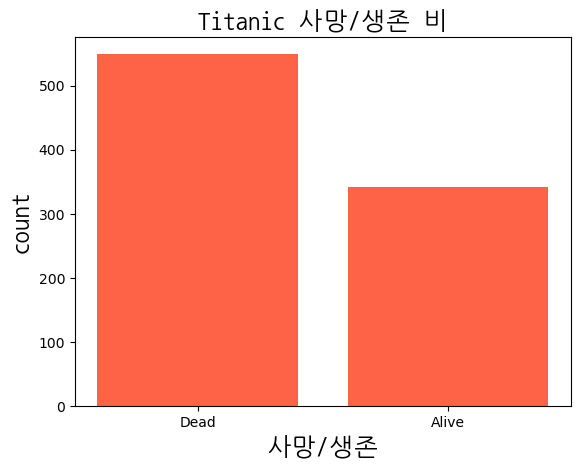

In [8]:
counts = df['Survived'].value_counts()

plt.bar(["Dead", "Alive"], counts, color='tomato')
plt.xlabel('사망/생존', fontproperties=fontprop)
plt.ylabel("count", fontproperties=fontprop)
plt.title('Titanic 사망/생존 비', fontproperties=fontprop)

## Histogram
- 연속형 데이터의 분포를 확인하기 위한 방법
- 구간화를 얼마나 하느냐에 따라 더 상세해지기도 함 (bin)

Text(0.5, 1.0, 'Titanic Age Histogram')

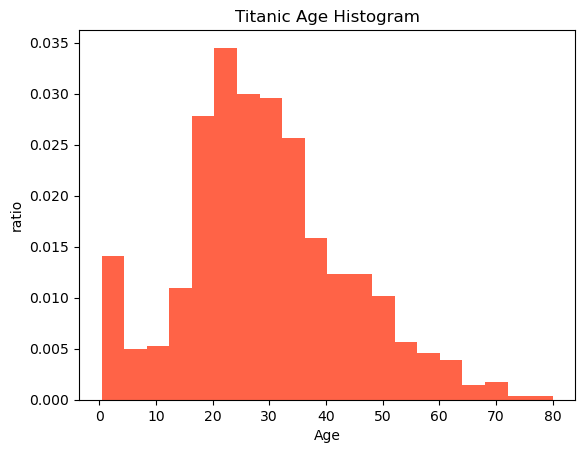

In [11]:
age = df['Age']

plt.hist(age, color="tomato", bins=20, density=True)
plt.xlabel('Age')
plt.ylabel("ratio")
plt.title('Titanic Age Histogram')

## Scatter Plot
- 두개의 데이터 혹은 세개의 변수끼리의 관계를 볼 수 있는 데이터 표현방식

In [12]:
re.head()

,registration_date,location,size,floor,old,type,KBIR,KRWDLR,MTL,CRM,ESIS,OBPR,APTTRD,VLTRD,price
0,2020-06-01,강남구,77.75,4,32.0,apt,0.5,1208.845455,2.49,125739.8,74.3,99.71,139.9,97.2,149500
1,2020-06-01,강남구,79.97,4,33.0,apt,0.5,1208.845455,2.49,125739.8,74.3,99.71,139.9,97.2,162750
2,2020-06-01,강남구,79.97,5,33.0,apt,0.5,1208.845455,2.49,125739.8,74.3,99.71,139.9,97.2,160000
3,2020-06-01,강남구,79.97,2,33.0,apt,0.5,1208.845455,2.49,125739.8,74.3,99.71,139.9,97.2,150000
4,2020-06-01,강남구,67.28,2,33.0,apt,0.5,1208.845455,2.49,125739.8,74.3,99.71,139.9,97.2,165000


Text(0.5, 1.0, 'size - price scatter plot')

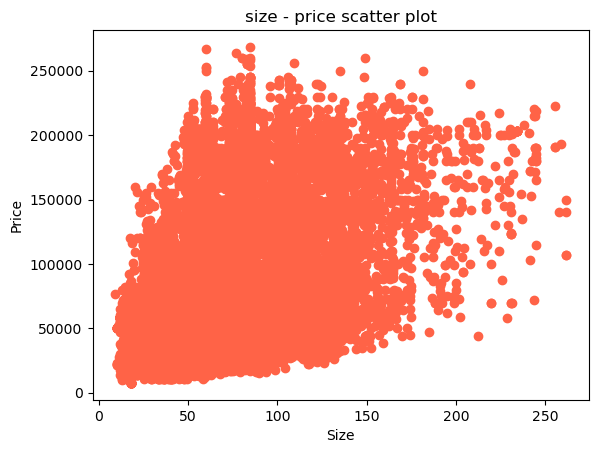

In [13]:
x = re['size']
y = re['price']

plt.scatter(x,y, color='tomato')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('size - price scatter plot')

## Line Plot
- 시간에 따라 움직이는 데이터를 표현할 때 씀

In [14]:
gangnam = re[re.location == '강남구'].copy()

gangnam = gangnam.groupby('registration_date')['price'].mean().reset_index(name='Price')

Text(0.5, 1.0, 'Mean House Price per month')

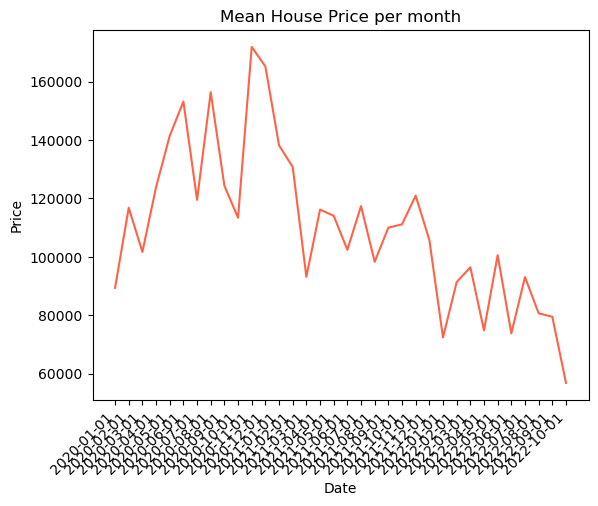

In [15]:
x = gangnam['registration_date']
y = gangnam['Price']

plt.plot(x, y, color = 'tomato')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.title('Mean House Price per month')

## Groupby Plot
- 그룹에 따라 나뉘게 plotting 하는 기법
- 그룹이 outcome에 어떻게 영향을 미쳤는지 직관적으로 확인할 수 있다.

In [16]:
sample = re[(re.location == '강남구') | (re.location == '강북구')]
sample = sample[sample.type == 'apt'].copy()

sample = sample[['registration_date', 'location', 'price']].copy()
sample.head()

,registration_date,location,price
0,2020-06-01,강남구,149500
1,2020-06-01,강남구,162750
2,2020-06-01,강남구,160000
3,2020-06-01,강남구,150000
4,2020-06-01,강남구,165000


In [17]:
plot_this = sample.groupby(['location', 'registration_date'],as_index=False).mean()

plot_this.head()

,location,registration_date,price
0,강남구,2020-01-01,111079.230769
1,강남구,2020-02-01,134025.769231
2,강남구,2020-03-01,118492.105263
3,강남구,2020-04-01,147280.459770
4,강남구,2020-05-01,148200.120419


In [30]:
# 한글 설정

plt.rc('font', family='NanumGothicCoding')
%matplotlib inline

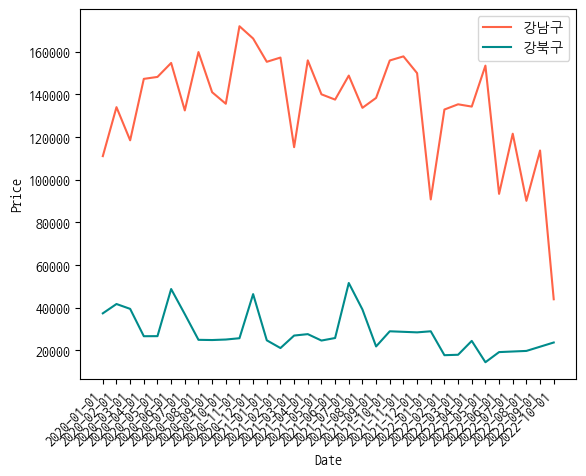

In [33]:
colors = ['tomato', 'darkcyan']

for idx, loc in enumerate(plot_this['location'].unique()):
    temp_df = plot_this[plot_this.location == loc]
    plt.plot(temp_df['registration_date'], temp_df['price'], label=loc, color=colors[idx])

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()